# INDIA LIFE EXPECTANCY PREDICTION

In [1]:
#IMPORTING REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### TASK 1: INSEPCTING AND CLEANING THE DATABASE

#### SUBTASK 1.1: READ THE DATAFRAME

Read the historical dataframe of India's Life Expectancy(in years) and store it in variable ile.

In [2]:
ile=pd.read_csv("India_Life_Expectancy_Data.csv")

Let's see the dataframe.

In [3]:
ile

,date,Life Expectancy from Birth (Years)
0,31-12-1950,35.21
1,31-12-1951,35.80
2,31-12-1952,36.39
3,31-12-1953,36.98
4,31-12-1954,37.57
...,...,...
146,NaN,NaN
147,NaN,NaN
148,NaN,NaN
149,NaN,NaN


#### SUBTASK 1.2: CLEANING THE DATA

Let's find number of null values.

In [4]:
ile.isnull().sum()

date                                   83
 Life Expectancy from Birth (Years)    83
dtype: int64

Drop the rows having null values.

In [5]:
ile.dropna(axis=0,inplace=True)
ile

,date,Life Expectancy from Birth (Years)
0,31-12-1950,35.21
1,31-12-1951,35.80
2,31-12-1952,36.39
3,31-12-1953,36.98
4,31-12-1954,37.57
...,...,...
63,31-12-2013,67.77
64,31-12-2014,68.07
65,31-12-2015,68.37
66,31-12-2016,68.67


#### SUBTASK 1.3: INSPECT THE DATA

Information about dataframe

In [6]:
ile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 68 non-null     object 
 1    Life Expectancy from Birth (Years)  68 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
ile.shape

(68, 2)

In [8]:
ile.columns

Index(['date', ' Life Expectancy from Birth (Years)'], dtype='object')

Convert the 'date' column to 'Year' column.

In [9]:
ile['date']=pd.to_datetime(ile['date'])
ile['date']=ile['date'].map(lambda x: x.year)
ile.columns=['Years','Life Expectancy from Birth (Years)']
ile

,Years,Life Expectancy from Birth (Years)
0,1950,35.21
1,1951,35.80
2,1952,36.39
3,1953,36.98
4,1954,37.57
...,...,...
63,2013,67.77
64,2014,68.07
65,2015,68.37
66,2016,68.67


### TASK 2: EXPLORATORY DATA ANALYSIS

Create simple plot to check out the data.

Text(0, 0.5, 'Life Expectancy from Birth(in years)')

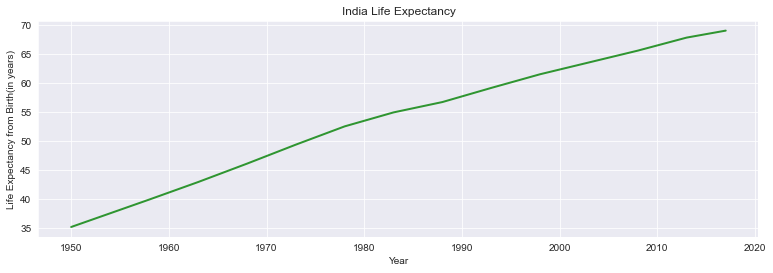

In [94]:
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,3))
axes=fig.add_axes([1,1,1,1])
axes.plot(ile['Years'],ile['Life Expectancy from Birth (Years)'],color='green',lw=2,alpha=0.8)
axes.set_title("India Life Expectancy")
axes.set_xlabel("Year")
axes.set_ylabel("Life Expectancy from Birth(in years)")

#### Annual Growth Rate in Life Expectancy.

Create a new feature called Annual Growth Rate.

In [17]:
length=len(ile['Years'])
for i in range(0,length-1):
    ile['Annual Growth Rate'][i+1]=100*(ile['Life Expectancy from Birth (Years)'][i+1]-ile['Life Expectancy from Birth (Years)'][i])/ile['Life Expectancy from Birth (Years)'][i]
ile['Annual Growth Rate'][0]=0
ile

,Years,Life Expectancy from Birth (Years),Annual Growth Rate
0,1950,35.21,0.000000
1,1951,35.80,1.675660
2,1952,36.39,1.648045
3,1953,36.98,1.621325
4,1954,37.57,1.595457
...,...,...,...
63,2013,67.77,0.665459
64,2014,68.07,0.442674
65,2015,68.37,0.440723
66,2016,68.67,0.438789


#### Average Annual Growth Rate.

In [18]:
ile['Annual Growth Rate'].mean()

0.9944367399492571

Create a plot to find how annual growth rate changes with time.

Text(0, 0.5, 'Annual Growth Rate(%)')

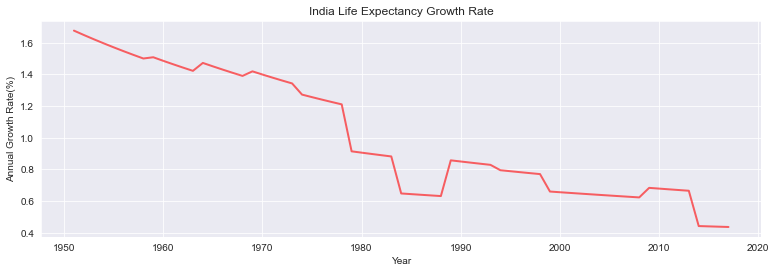

In [19]:
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,3))
axes=fig.add_axes([1,1,1,1])
axes.plot(ile['Years'][1:],ile['Annual Growth Rate'][1:],color='red',lw=2,alpha=0.6)
axes.set_title("India Life Expectancy Growth Rate")
axes.set_xlabel("Year")
axes.set_ylabel("Annual Growth Rate(%)")

### TASK 3: CREATING AND TRAINING A LINEAR REGRESSION MODEL

#### SUBTASK 3.1: Prediction of India Life Expectancy in future on the basis of historical data.

In [72]:
X=ile['Years'].values.reshape(-1,1)
y1=ile['Life Expectancy from Birth (Years)'].values
X,y1

(array([[1950],
        [1951],
        [1952],
        [1953],
        [1954],
        [1955],
        [1956],
        [1957],
        [1958],
        [1959],
        [1960],
        [1961],
        [1962],
        [1963],
        [1964],
        [1965],
        [1966],
        [1967],
        [1968],
        [1969],
        [1970],
        [1971],
        [1972],
        [1973],
        [1974],
        [1975],
        [1976],
        [1977],
        [1978],
        [1979],
        [1980],
        [1981],
        [1982],
        [1983],
        [1984],
        [1985],
        [1986],
        [1987],
        [1988],
        [1989],
        [1990],
        [1991],
        [1992],
        [1993],
        [1994],
        [1995],
        [1996],
        [1997],
        [1998],
        [1999],
        [2000],
        [2001],
        [2002],
        [2003],
        [2004],
        [2005],
        [2006],
        [2007],
        [2008],
        [2009],
        [2010],
        [2011],
        

####  SUBTASK 3.2: SPLIT DATA INTO TRAINING AND TESTING DATA

In [73]:
#USING SCIKIT-LEARN LIBRARY WE ARE GOING SPLIT TO THE DATA INTO TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y1,test_size=0.33)

#### SUBTASK 3.3: CREATE A LINEAR REGRESSION MODEL

In [74]:
#USING SCIKIT-LEARN LIBRARY WE ARE GOING TO CREATE A LINEAR REGRESSION MODEL AND NAME IT lmr.
from sklearn.linear_model import LinearRegression
lmr=LinearRegression()

#### SUBTASK 3.4: TRAIN THE MODEL

In [75]:
lmr.fit(X_train,y_train)

LinearRegression()

#### SUBTASK 3.5: MODEL EVALUATION

In [76]:
#intercept
lmr.intercept_

-950.3147985327548

In [77]:
#coefficent
lmr.coef_[0]

0.5061580631625544

#### SUBTASK 3.1.5: PREDICTION FROM MODEL

In [78]:
Ypred=lmr.predict(X_test)
Ypred

array([66.55675036, 52.89048266, 65.03827617, 41.75500527, 40.23653108,
       48.84121815, 39.22421495, 38.71805689, 54.40895684, 47.82890202,
       48.33506009, 49.34737621, 43.77963752, 46.8165859 , 65.54443423,
       59.97669554, 64.02596005, 63.01364392, 53.90279878, 62.50748586,
       51.87816653, 56.4335891 , 54.91511491])

Text(0, 0.5, 'Life Expectancy from Birth(in years)')

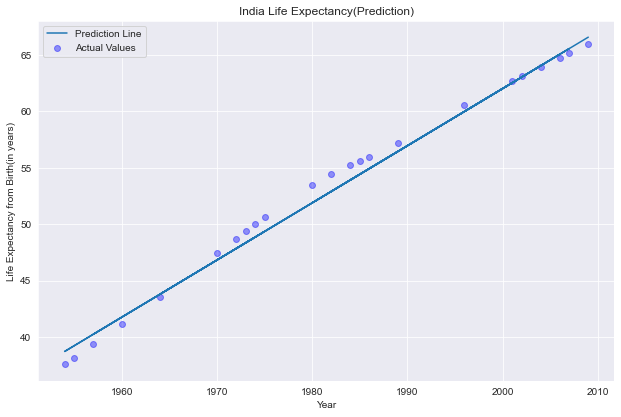

In [95]:
sns.set_style('darkgrid')
fig=plt.figure(figsize=(8,5))
axes=fig.add_axes([1,1,1,1])
axes.plot(X_test,Ypred,label="Prediction Line")
plt.scatter(X_test,y_test,alpha=0.4,label="Actual Values",c="blue")
plt.legend(loc=0)
axes.set_title("India Life Expectancy(Prediction)")
axes.set_xlabel("Year")
axes.set_ylabel("Life Expectancy from Birth(in years)")

Text(0, 0.5, 'Predicted Values')

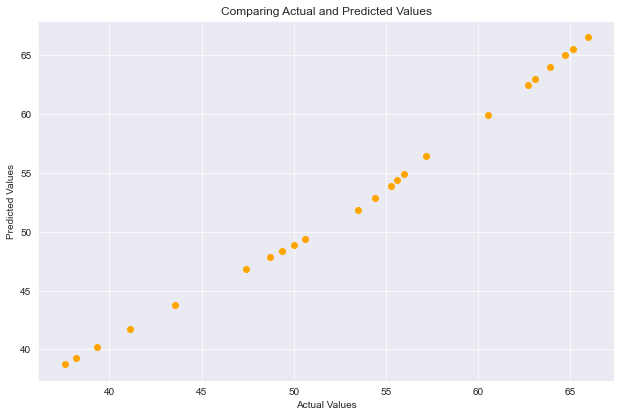

In [96]:
sns.set_style('darkgrid')
fig=plt.figure(figsize=(8,5))
axes=fig.add_axes([1,1,1,1])
plt.scatter(y_test,Ypred,c="orange",alpha=1)
axes.set_title("Comparing Actual and Predicted Values")
axes.set_xlabel("Actual Values")
axes.set_ylabel("Predicted Values")

#### Residual Histogram

Text(0.5, 1.0, 'Residual Histogram')

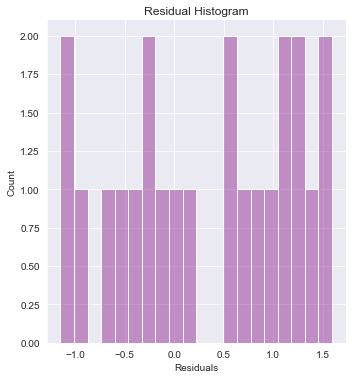

In [97]:
sns.displot((y_test-Ypred),bins=20,color="purple",alpha=0.4)
plt.xlabel("Residuals")
plt.title("Residual Histogram")

#### ACCURACY AND ERRORS

In [88]:
import sklearn.metrics as sm
print("Mean absolute error =",round(sm.mean_absolute_error(y_test, Ypred), 2)) 
print("Mean squared error =",round(sm.mean_squared_error(y_test,Ypred), 2)) 
print("Root mean absolute error =",round((np.sqrt(sm.mean_squared_error(y_test,Ypred))),2))

Mean absolute error = 0.81
Mean squared error = 0.86
Root mean absolute error = 0.93


In [89]:
print("ACCURACY:", round((sm.r2_score(y_test,Ypred)*100),2),"%")

ACCURACY: 98.91 %


#### PREDICTION OF LIFE EXPECTANCY IN INDIA IN 2022.

In [90]:
print("PREDICTED LIFE a IN INDIA IN 2022 is {}.".format(round((lmr.predict([[2022]])[0]),2)))

PREDICTED LIFE a IN INDIA IN 2022 is 73.14.
